In [1]:
import matplotlib.pyplot as plt

In [2]:
import random
import math
import numpy as np
def generate():
    while True:
        V1 =(np.random.rand()*2) - 1.0
        V2 =(np.random.rand()*2) - 1.0
        W = V1 * V1 + V2 * V2
        if (W < 1.0):
            LW = math.log(W) / W
            LW = math.sqrt(-2.0 * LW)
            G1 = V1 * LW
            G2 = V2 * LW
    
            return G1, G2

# Ejemplo de uso:
G1, G2 = generate()
print("G1:", G1)
print("G2:", G2)

G1: -0.03661174751359387
G2: 0.7815105270383446


In [3]:
def HW(dta):
    #subroutina que usa generate para obtener W(t)
    g1,g2=generate()
    w1=g1
    w2=g2
    dw=(g2-g1)*np.sqrt(dta)
    return dw

In [4]:
def estocasticaxM(nobs,a,s,b,T,n,x0,t):
    n1=len(t)
    x2=np.zeros(n1)

    for k in range(0,n1):
        sumaE=0
        for i in range(k-1):
            #print('tk','ti',t[i+1]-t[i])
            dta=t[i+1]-t[i]
            sumaE=sumaE+np.exp(-b*(t[k]-t[i]))*HW(dta)
        r=(a-(s**2)/2.)/b
        #print(sumaE)
        x2[k]=nobs*np.exp(r+(np.log(x0/nobs)-r)*np.exp(-b*t[k])+ s*sumaE) #la parte estocástica
    return x2

# Results


# Figura 5

In [5]:
sig1=np.linspace(0.025,5.00,100000)
#print(sig1)

In [6]:
a_g=0.8
V0=0.5

In [7]:
Vobs1=0.005
blim=(a_g-sig1**2/2.)/np.log(V0/Vobs1)
#Vobs2=0.010
#blim2=(a_g-sig1**2/2.)/np.log(V0/Vobs2)
Vobs3=0.050
blim3=(a_g-sig1**2/2.)/np.log(V0/Vobs3)
Vobs4=0.100
blim4=(a_g-sig1**2/2.)/np.log(V0/Vobs4)
Vobs5=0.499
blim5=(a_g-sig1**2/2.)/np.log(V0/Vobs5)

(0.0, 1.4)

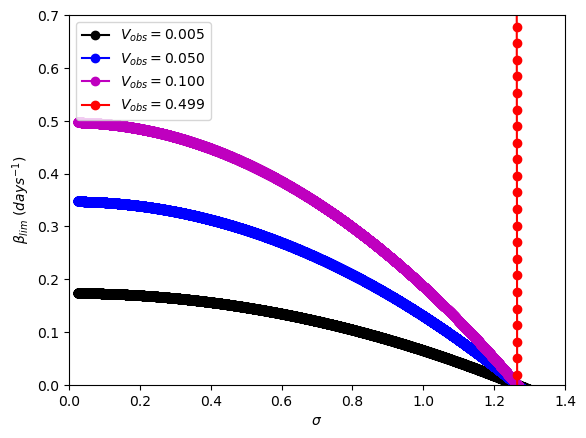

In [8]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])

ax1.plot(sig1,blim,'k-o')
#ax1.plot(sig1,blim2,'g-o')
ax1.plot(sig1,blim3,'b-o')
ax1.plot(sig1,blim4,'m-o')
ax1.plot(sig1,blim5,'r-o')


ax1.set_xlabel('$\\sigma}$')
ax1.set_ylabel('$\\beta_{lim}$ $(days^{-1})$')
ax1.legend(['$V_{obs}=0.005$','$V_{obs}=0.050$','$V_{obs}=0.100$','$V_{obs}=0.499$' ])
ax1.set_ylim(0.,0.7)
ax1.set_xlim(0,1.4)


In [9]:
fig.savefig("F3_beta_lim_Vobs.png",bbox_inches='tight')

# $\sigma$ vs $\beta$

In [10]:
b1=np.linspace(0.00,1.00,10000)
a_g=0.8
V0=0.5

Vobs1=0.005
slim=np.sqrt(2*(a_g-b1*np.log(V0/Vobs1)))
Vobs2=0.010
slim2=np.sqrt(2*(a_g-b1*np.log(V0/Vobs2)))
Vobs3=0.050
slim3=np.sqrt(2*(a_g-b1*np.log(V0/Vobs3)))
Vobs4=0.100
slim4=np.sqrt(2*(a_g-b1*np.log(V0/Vobs4)))
Vobs5=0.499
slim5=np.sqrt(2*(a_g-b1*np.log(V0/Vobs5)))

C:\Users\b_bon\AppData\Local\Temp\ipykernel_8156\3019989681.py:6: RuntimeWarning: invalid value encountered in sqrt
  slim=np.sqrt(2*(a_g-b1*np.log(V0/Vobs1)))
C:\Users\b_bon\AppData\Local\Temp\ipykernel_8156\3019989681.py:8: RuntimeWarning: invalid value encountered in sqrt
  slim2=np.sqrt(2*(a_g-b1*np.log(V0/Vobs2)))
C:\Users\b_bon\AppData\Local\Temp\ipykernel_8156\3019989681.py:10: RuntimeWarning: invalid value encountered in sqrt
  slim3=np.sqrt(2*(a_g-b1*np.log(V0/Vobs3)))
C:\Users\b_bon\AppData\Local\Temp\ipykernel_8156\3019989681.py:12: RuntimeWarning: invalid value encountered in sqrt
  slim4=np.sqrt(2*(a_g-b1*np.log(V0/Vobs4)))


In [11]:
print(b1[1000])

0.10001000100010002


(0.0, 0.6)

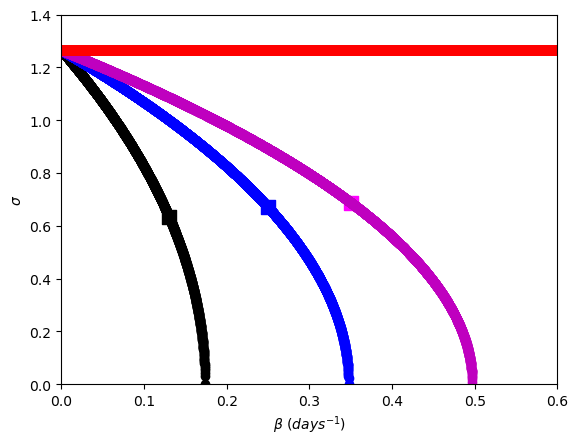

In [12]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])

ax1.plot(b1,slim,'ko-')
#ax1.plot(b1,slim2,'go')
ax1.plot(b1,slim3,'bo-')
ax1.plot(b1,slim4,'mo-')
ax1.plot(b1,slim5,'ro-')
ax1.scatter(b1[1300],slim[1300],marker='s',color='black',s=100)
ax1.scatter(b1[2500],slim3[2500],marker='s',color='blue',s=100)
ax1.scatter(b1[3500],slim4[3500],marker='s',color='magenta',s=100)


ax1.set_xlabel('$\\beta $ $(days^{-1})$')
ax1.set_ylabel('$\\sigma$')
#ax1.legend(['$V_{obs}=0.005$','$V_{obs}=0.050$','$V_{obs}=0.100$','$V_{obs}=0.5$'], bbox_to_anchor = (1.01, 1.01))
ax1.set_ylim(0.,1.4)
ax1.set_xlim(0,0.6)

In [13]:
print(0.8/(np.log(0.5/0.005)))
print(0.8/(np.log(0.5/0.05)))
print(0.8/(np.log(0.5/0.1)))

0.17371779276130073
0.34743558552260145
0.4970679476476895


### Results

| :- | :- |
| $$V_{obs}$$ | $$\beta_{lim}$$ |
| :-: | :-: |
| 0.005 | 0.1737 | 
|0.05|0.3474 |
|0.1|0.4970|


0.13001300130013002 0.6344572524950917
0.25002500250025006 0.669770343277642
0.35003500350035005 0.6879540605120864


(0.01, 0.6)

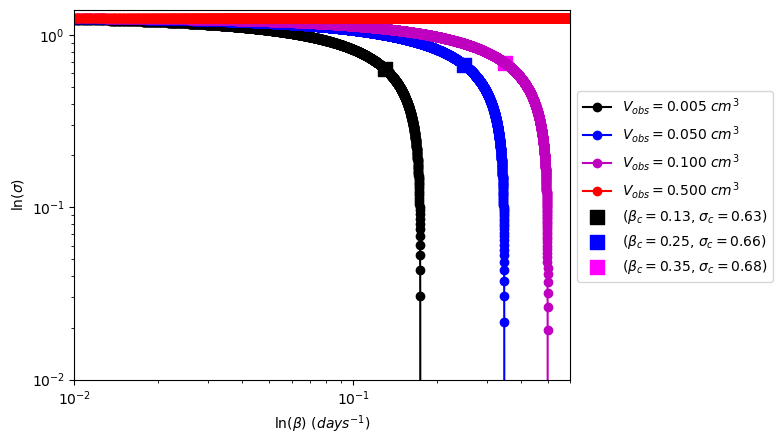

In [18]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])

ax1.plot(b1,slim,'ko-')
#ax1.plot(b1,slim2,'go')
ax1.plot(b1,slim3,'bo-')
ax1.plot(b1,slim4,'mo-')
ax1.plot(b1,slim5,'ro-')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.scatter(b1[1300],slim[1300],marker='s',color='black',s=100)
ax1.scatter(b1[2500],slim3[2500],marker='s',color='blue',s=100)
ax1.scatter(b1[3500],slim4[3500],marker='s',color='magenta',s=100)
print(b1[1300],slim[1300])
print(b1[2500],slim3[2500])
print(b1[3500],slim4[3500])
ax1.set_xlabel('ln($\\beta$) $(days^{-1})$')
ax1.set_ylabel('ln($\\sigma$)')
ax1.legend(['$V_{obs}=0.005$ $cm^3$','$V_{obs}=0.050$ $cm^3$','$V_{obs}=0.100$ $cm^3$','$V_{obs}=0.500$ $cm^3$',
            '($\\beta_c=0.13$, $\\sigma_c=0.63$)',
            '($\\beta_c=0.25$, $\\sigma_c=0.66$)',
            '($\\beta_c=0.35$, $\\sigma_c=0.68$)'], bbox_to_anchor = (1.0, .8))
ax1.set_ylim(0.01,1.4)
ax1.set_xlim(0.01,0.6)

In [15]:
fig.savefig("Figure5B.png",bbox_inches='tight')

# Figura 2-4

Figura 2: $\beta=0.06$ $days^{-1}$ 

A) $\sigma = 0.025$, B) $\sigma = 0.100$, C) $\sigma = 0.500$, D) $\sigma = 0.800$, E) $\sigma = 1.000$, F) $\sigma = 1.200$

Figura 3: $\beta=0.2$ $days^{-1}$

A) $\sigma = 0.025$, B) $\sigma = 0.100$, C) $\sigma = 0.500$, D) $\sigma = 0.800$, E) $\sigma = 1.000$, F) $\sigma = 1.200$

Figura 4: $\beta=0.4$ $days^{-1}$

A) $\sigma = 0.025$, B) $\sigma = 0.100$, C) $\sigma = 0.500$, D) $\sigma = 0.800$, E) $\sigma = 1.000$, F) $\sigma = 1.200$


a:  0.8  b:  0.4
a:  0.8  b:  0.4
a:  0.8  b:  0.4
a:  0.8  b:  0.4


(0.0, 30.0)

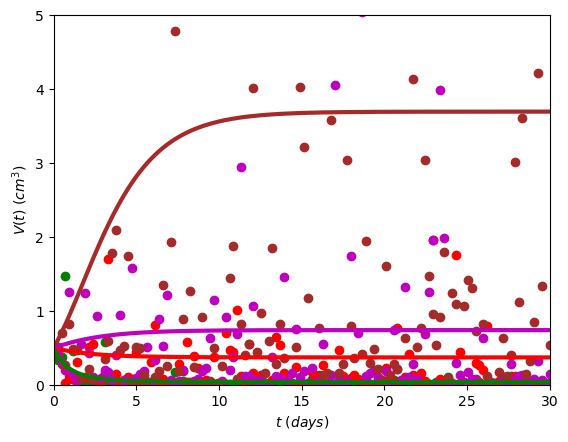

In [16]:
fig, ax1 = plt.subplots()
x0=0.5
T=30
n=128
t=np.linspace(0,T,n)
nobs=0.005

b_g=0.4#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'g-', linewidth=3)

nobs=0.050

b_g=0.4#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'r-', linewidth=3)

nobs=0.1

b_g=0.4#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'m-',  linewidth=3)

nobs=0.5

b_g=0.4#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'brown',  linewidth=3)


b_g=0.4#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

nobs=0.005
s=1.2
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='g')

nobs=0.05
s=1.2
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='r')

nobs=0.1
s=1.2
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='m')

nobs=0.5
s=1.2
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='brown')



ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')
#ax[1,1].set_title('$\\beta=0.5(days^{-1})$')

ax1.set_ylim(0,5)
ax1.set_xlim(0,30)
#ax1.legend(['$V_{obs}=0.005$ $cm^3$','$V_{obs}=0.050$ $cm^3$',
#           '$V_{obs}=0.100$ $cm^3$','$V_{obs}=0.500$ $cm^3$'], bbox_to_anchor = (1.36, 1.01))


In [53]:
fig.savefig("Figure4F.png",bbox_inches='tight')

a:  0.8  b:  0.8
a:  0.8  b:  0.8
a:  0.8  b:  0.8
a:  0.8  b:  0.8


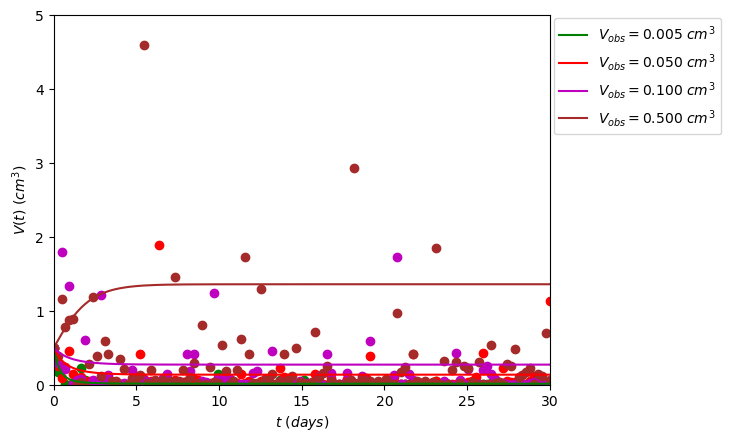

In [50]:

fig, ax1 = plt.subplots()
x0=0.5
T=30
n=128
t=np.linspace(0,T,n)
nobs=0.005

b_g=0.8#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'g-')

nobs=0.050

b_g=0.8#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'r-')

nobs=0.1

b_g=0.8#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'m-')

nobs=0.5

b_g=0.8#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
s=0
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'brown')


b_g=0.8#np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

nobs=0.005
s=2.
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='g')

nobs=0.05
s=2.
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='r')
nobs=0.1
s=2.
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='m')

nobs=0.5
s=2.
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.scatter(t,x3,c='brown')



ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')
#ax[1,1].set_title('$\\beta=0.5(days^{-1})$')

ax1.set_ylim(0,5)
ax1.set_xlim(0,30)
ax1.legend(['$V_{obs}=0.005$ $cm^3$','$V_{obs}=0.050$ $cm^3$',
           '$V_{obs}=0.100$ $cm^3$','$V_{obs}=0.500$ $cm^3$'], bbox_to_anchor = (1.36, 1.01))


In [51]:
fig.savefig("F2f_Vt_s2_b08.png",bbox_inches='tight')

 # FIGURA 1

a:  0.8  b:  0.06
a:  0.8  b:  0.17
a:  0.8  b:  0.22
a:  0.8  b:  0.34
a:  0.8  b:  0.5
a:  0.8  b:  1.0


Text(0, 0.5, '$V(t)$ $(cm^3)$')

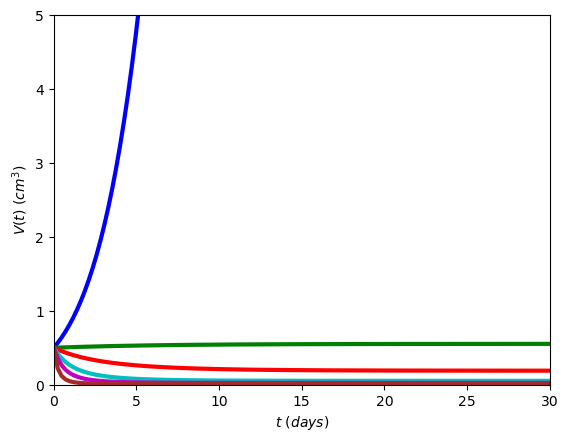

In [12]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])
x0=0.5
T=30
n=128
t=np.linspace(0,T,n)

nobs=0.005

s=0.
b_g=0.06 #np.array(datosfinales08[0,0,2])
a_g=0.8 #np.array(datosfinales08[0,0,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'b',  linewidth=3)

b_g=0.17#np.array(datosfinales08[0,2,2])
a_g=0.8 #np.array(datosfinales08[0,2,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'g', linewidth=3 )

b_g=0.22 #np.array(datosfinales08[0,4,2])
a_g=0.8 #np.array(datosfinales08[0,4,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'r', linewidth=3)

b_g=0.34 #np.array(datosfinales08[0,6,2])
a_g=0.8 #np.array(datosfinales08[0,6,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'c', linewidth=3)

b_g=0.50 #np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'m',linewidth=3)

b_g=1. #np.array(datosfinales08[0,10,2])
a_g=0.8 #np.array(datosfinales08[0,10,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'brown', linewidth=3)

 #np.array(datosfinales08[0,10,2])
#a_g=0.8 #np.array(datosfinales08[0,10,1])
#b_g=a_g/np.log(x0/nobs)
#print('a: ', a_g, ' b: ',b_g)
#x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

#ax1.plot(t,x3,'black', linewidth=3)

ax1.set_ylim(0,5)
ax1.set_xlim(0,30)

ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')

#ax1.legend(['$\\beta=0.06$ $days^{-1}$','$\\beta=0.17$ $days^{-1}$','$\\beta=0.22$ $days^{-1}$',
#            '$\\beta=0.34$ $days^{-1}$','$\\beta=0.50$ $days^{-1}$','$\\beta=1.00$ $days^{-1}$'],bbox_to_anchor = (1.3, 1.01),prop={'size':8.5})
#fig.suptitle('$\\sigma=0$') 




In [11]:
fig.savefig("F1A_Vobs005.png",bbox_inches='tight')

Vobs=0.05
a:  0.8  b:  0.06
a:  0.8  b:  0.17
a:  0.8  b:  0.22
a:  0.8  b:  0.34
a:  0.8  b:  0.5
a:  0.8  b:  1.0
a:  0.8  b:  0.34743558552260145


(0.0, 5.0)

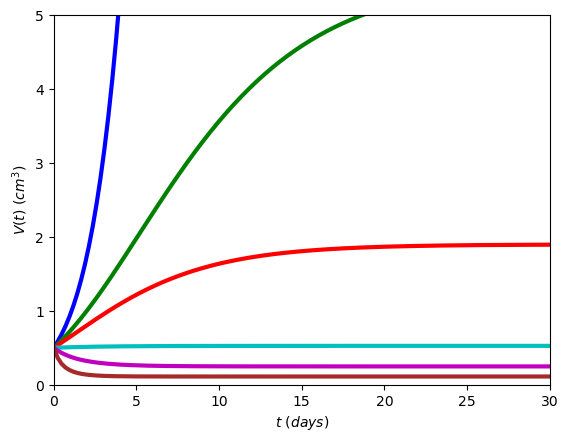

In [13]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])

print('Vobs=0.05')

x0=0.5
T=30
n=128
t=np.linspace(0,T,n)
nobs=0.05
s=0.
b_g=0.06 #np.array(datosfinales08[0,0,2])
a_g=0.8 #np.array(datosfinales08[0,0,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'b', linewidth=3)

b_g=0.17#np.array(datosfinales08[0,2,2])
a_g=0.8 #np.array(datosfinales08[0,2,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)
ax1.plot(t,x3,'g', linewidth=3)

b_g=0.22 #np.array(datosfinales08[0,4,2])
a_g=0.8 #np.array(datosfinales08[0,4,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'r', linewidth=3)

b_g=0.34 #np.array(datosfinales08[0,6,2])
a_g=0.8 #np.array(datosfinales08[0,6,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'c', linewidth=3)

b_g=0.50 #np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'m', linewidth=3)

b_g=1.#np.array(datosfinales08[0,10,2])
a_g=0.8 #np.array(datosfinales08[0,10,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'brown', linewidth=3)

a_g=0.8 #np.array(datosfinales08[0,10,1])
b_g=a_g/np.log(x0/nobs)
print('a: ', a_g, ' b: ',b_g)


ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')
#ax1.legend(['$\\beta=0.06$ $days^{-1}$','$\\beta=0.17$ $days^{-1}$','$\\beta=0.22$ $days^{-1}$','$\\beta=0.34$ $days^{-1}$',
#            '$\\beta=0.50$ $days^{-1}$','$\\beta=1.00$ $days^{-1}$'],bbox_to_anchor = (1.3, 1.01),prop={'size':8.5})
ax1.set_xlim(0,30)
ax1.set_ylim(0,5)

#ax[2,1].legend(['0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8'], bbox_to_anchor = (1.01, 1.01))


In [14]:
fig.savefig("F1B_Vobs05.png",bbox_inches='tight')

Vobs=0.1
a:  0.8  b:  0.06
a:  0.8  b:  0.17
a:  0.8  b:  0.22
a:  0.8  b:  0.34
a:  0.8  b:  0.5
a:  0.8  b:  1.0
a:  0.8  b:  0.4970679476476895


Text(0, 0.5, '$V(t)$ $(cm^3)$')

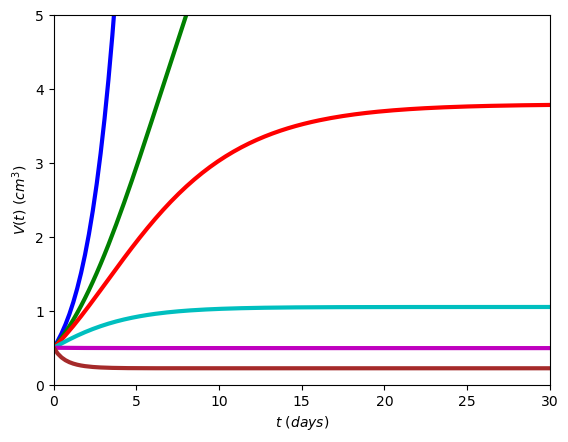

In [22]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])


print('Vobs=0.1')

x0=0.5
T=30
n=128
t=np.linspace(0,T,n)
nobs=0.1

s=0.
b_g=0.06 #np.array(datosfinales08[0,0,2])
a_g=0.8 #np.array(datosfinales08[0,0,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'b', linewidth=3)


b_g=0.17#np.array(datosfinales08[0,2,2])
a_g=0.8 #np.array(datosfinales08[0,2,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'g', linewidth=3)

b_g=0.22 #np.array(datosfinales08[0,4,2])
a_g=0.8 #np.array(datosfinales08[0,4,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'r', linewidth=3)


b_g=0.34 #np.array(datosfinales08[0,6,2])
a_g=0.8 #np.array(datosfinales08[0,6,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'c', linewidth=3)


b_g=0.50 #np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'m', linewidth=3)

b_g=1.00 #np.array(datosfinales08[0,10,2])
a_g=0.8 #np.array(datosfinales08[0,10,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'brown', linewidth=3)

a_g=0.8 #np.array(datosfinales08[0,10,1])
b_g=a_g/np.log(x0/nobs)
print('a: ', a_g, ' b: ',b_g)




ax1.set_xlim(0,30)
ax1.set_ylim(0,5)
ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')
#ax1.legend(['0.05','0.1','0.2','0.25','0.3','0.35','0.4','0.45','0.5'], bbox_to_anchor = (1.01, 1.01))
#ax1.legend(['$\\beta=0.06$ $days^{-1}$','$\\beta=0.17$ $days^{-1}$','$\\beta=0.22$ $days^{-1}$','$\\beta=0.34$ $days^{-1}$',
#                '$\\beta=0.50$ $days^{-1}$','$\\beta=1.00$ $days^{-1}$'], bbox_to_anchor = (1.01, 1.01),prop={'size':8.5})


In [21]:
fig.savefig("F1C_Vobs1.png",bbox_inches='tight')

Vobs=0.5
a:  0.8  b:  0.06
a:  0.8  b:  0.17
a:  0.8  b:  0.22
a:  0.8  b:  0.34
a:  0.8  b:  0.5
a:  0.8  b:  1.0


Text(0, 0.5, '$V(t)$ $(cm^3)$')

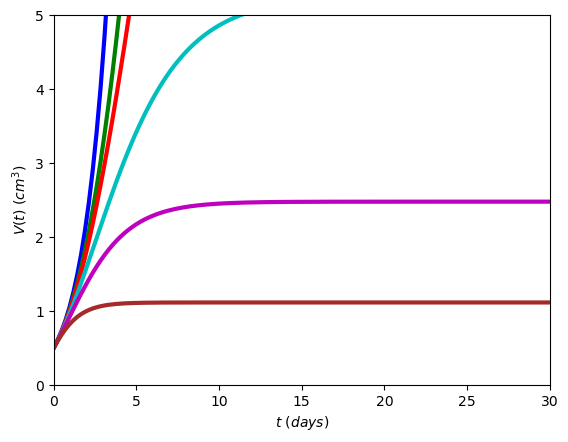

In [26]:
fig, ax1 = plt.subplots()
#fig.set_size_inches([9,9])

#left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]
#ax2 = fig.add_axes([left, bottom, width, height])



print('Vobs=0.5')

x0=0.5
T=30
n=128
t=np.linspace(0,T,n)
nobs=0.5

s=0.
b_g=0.06 #np.array(da55tosfinales08[0,0,2])
a_g=0.8 #np.array(datosfinales08[0,0,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'b', linewidth=3)
#ax2.plot(t,x3,'b')


b_g=0.17#np.array(datosfinales08[0,2,2])
a_g=0.8 #np.array(datosfinales08[0,2,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'g', linewidth=3)
#ax2.plot(t,x3,'g')

b_g=0.22 #np.array(datosfinales08[0,4,2])
a_g=0.8 #np.array(datosfinales08[0,4,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'r', linewidth=3)
#ax2.plot(t,x3,'r')


b_g=0.34 #np.array(datosfinales08[0,6,2])
a_g=0.8 #np.array(datosfinales08[0,6,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'c', linewidth=3)
#ax2.plot(t,x3,'c')


b_g=0.50 #np.array(datosfinales08[0,8,2])
a_g=0.8 #np.array(datosfinales08[0,8,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'m', linewidth=3)
#ax2.plot(t,x3,'m')

b_g=1.0 #np.array(datosfinales08[0,10,2])
a_g=0.8 #np.array(datosfinales08[0,10,1])
print('a: ', a_g, ' b: ',b_g)
x3=estocasticaxM(nobs,a_g,s,b_g,T,n,x0,t)

ax1.plot(t,x3,'brown', linewidth=3)
#ax2.plot(t,x3,'y')


ax1.set_xlim(0,30)
ax1.set_ylim(0,5)
ax1.set_xlabel('$t$ $(days)$')
ax1.set_ylabel('$V(t)$ $(cm^3)$')
#ax1.legend(['0.05','0.1','0.2','0.25','0.3','0.35','0.4','0.45','0.5'], bbox_to_anchor = (1.01, 1.01))
#ax2.set_xlim(0,30)
#ax2.set_ylim(0,0.5)
#ax2.set_xlabel('$t$ $(days)$')
#ax2.set_ylabel('$V(t)$ $(cm^3)$')
#ax1.legend(['$\\beta=0.06$ $days^{-1}$','$\\beta=0.17$ $days^{-1}$',
#                '$\\beta=0.22$ $days^{-1}$','$\\beta=0.34$ $days^{-1}$',
#                '$\\beta=0.50$ $days^{-1}$','$\\beta=1.00$ $days^{-1}$'],bbox_to_anchor = (1.2, 1.2), prop={'size':8.5})


In [25]:
fig.savefig("F1d_Vt_Vobs5.png",bbox_inches='tight')